# Exploratory Data Analysis

Breast cancer is one of the most common types of cancer, and early detection is crucial in its treatment. It develops from breast tissue when cells in the region grow out of control. One of the key steps in treating breast cancer is  accurate diagnosis.
We want to predict whether the cancer is benign or malignant, here we start by understand the dataset.

In [20]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
# from scripts.dataframe_cleaner import DfCleaner
# from scripts.log import App_Logger
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("../data/data.csv")

# About the dataset
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Columns represent:
#### 1. ID number
#### 2. Diagnosis (M = malignant, B = benign) 
#### 3-32 
#### Ten real-valued features are computed for each cell nucleus:
#### a. radius (mean of distances from center to points on the perimeter)
#### b. texture (standard deviation of gray-scale values)
#### c. perimeter 
#### d) area 
#### e) smoothness (local variation in radius lengths)
#### f. compactness (perimeter^2 / area - 1.0)
#### g. concavity (severity of concave portions of the contour)
#### h. concave points (number of concave portions of the contour)
#### i. symmetry 
#### j) fractal dimension ("coastline approximation" - 1)
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

In [3]:
data.shape

(569, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
print('unique column values')
data.apply(lambda x: len(x.unique())).sort_values(ascending=False)

unique column values


id                         569
smoothness_se              547
fractal_dimension_se       545
area_worst                 544
concave points_mean        542
compactness_se             541
radius_se                  540
area_mean                  539
concavity_worst            539
compactness_mean           537
concavity_mean             537
fractal_dimension_worst    535
perimeter_se               533
concavity_se               533
compactness_worst          529
area_se                    528
perimeter_mean             522
texture_se                 519
perimeter_worst            514
texture_worst              511
concave points_se          507
symmetry_worst             500
fractal_dimension_mean     499
symmetry_se                498
concave points_worst       492
texture_mean               479
smoothness_mean            474
radius_worst               457
radius_mean                456
symmetry_mean              432
smoothness_worst           411
diagnosis                    2
Unnamed:

Check if there is a missing values

In [7]:
missing_values = data.isnull().sum()
missing_values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

We can exclude unnecessary columns from the dataset and separate dependent (y) and and independent(X) data:
* <b>There is an id that cannot be used for classification.</b>
*  <b>Diagnosis is our class label.</b>
*  <b>Unnamed: 32 feature is all NaN so we do not need it.</b>

In [13]:
# y includes our outcome label and X includes our features
y = data.diagnosis # M or B 
list_drp = ['Unnamed: 32','id','diagnosis']
X = data.drop(list_drp,axis = 1 )
X.shape

(569, 30)

In [1]:
# calculate duplicates
dups = X.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(X[dups])

NameError: name 'X' is not defined

We can see that:
<ul>
    <li>There are <b>569</b> instances of <b>data</b>.</li>
    <li>Total number of <b>features</b> equals <b>33</b>, of which <b>31 is numerical, </b> plus <b>Id</b> and <b>diagnosis.</b></li>
    <li>One <b>feature (Unnamed: 32)</b> has missing values in the dataset</li>
    <li> There is one unique column which is <b>'Id'</b></li>
    <li> No <b>duplicate</b> records</li>
 </ul>

In [18]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
X.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

c:\users\rafaa\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Number of Benign:  357
Number of Malignant :  212


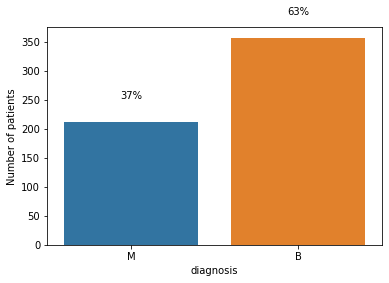

In [19]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
ax.set_ylabel('Number of patients')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

##  In summary <a class="anchor" id = "5noSummaryData"></a>
[Back to Table of Contents](#bcImp)

We can conclude that:
* Important summary statistics of all the numerical variables like the mean, std, min, 25%, 50%, 75%, and max values.
* There is <b>high variation</b> in values in <b>area_mean</b> and <b>area_worst.
* There are many variables have median value 0.
* The <b>area_worst</b> feature’s max value is <b>4254</b> and <b>fractal_dimension_se</b> features’ max <b>0.029840</b>. This indicates we need to standardize or normalize data before visualization, feature selection, and classification.
* <b>Bar plot</b> of <b>diagnosis</b> shows that <b>Malignant</b> and <b>Benign</b> patients ratio is <b>37% (212/569)</b> and <b>63% (357/569)</b> respectively. 

AttributeError: 'DataFrame' object has no attribute 'Outcome'

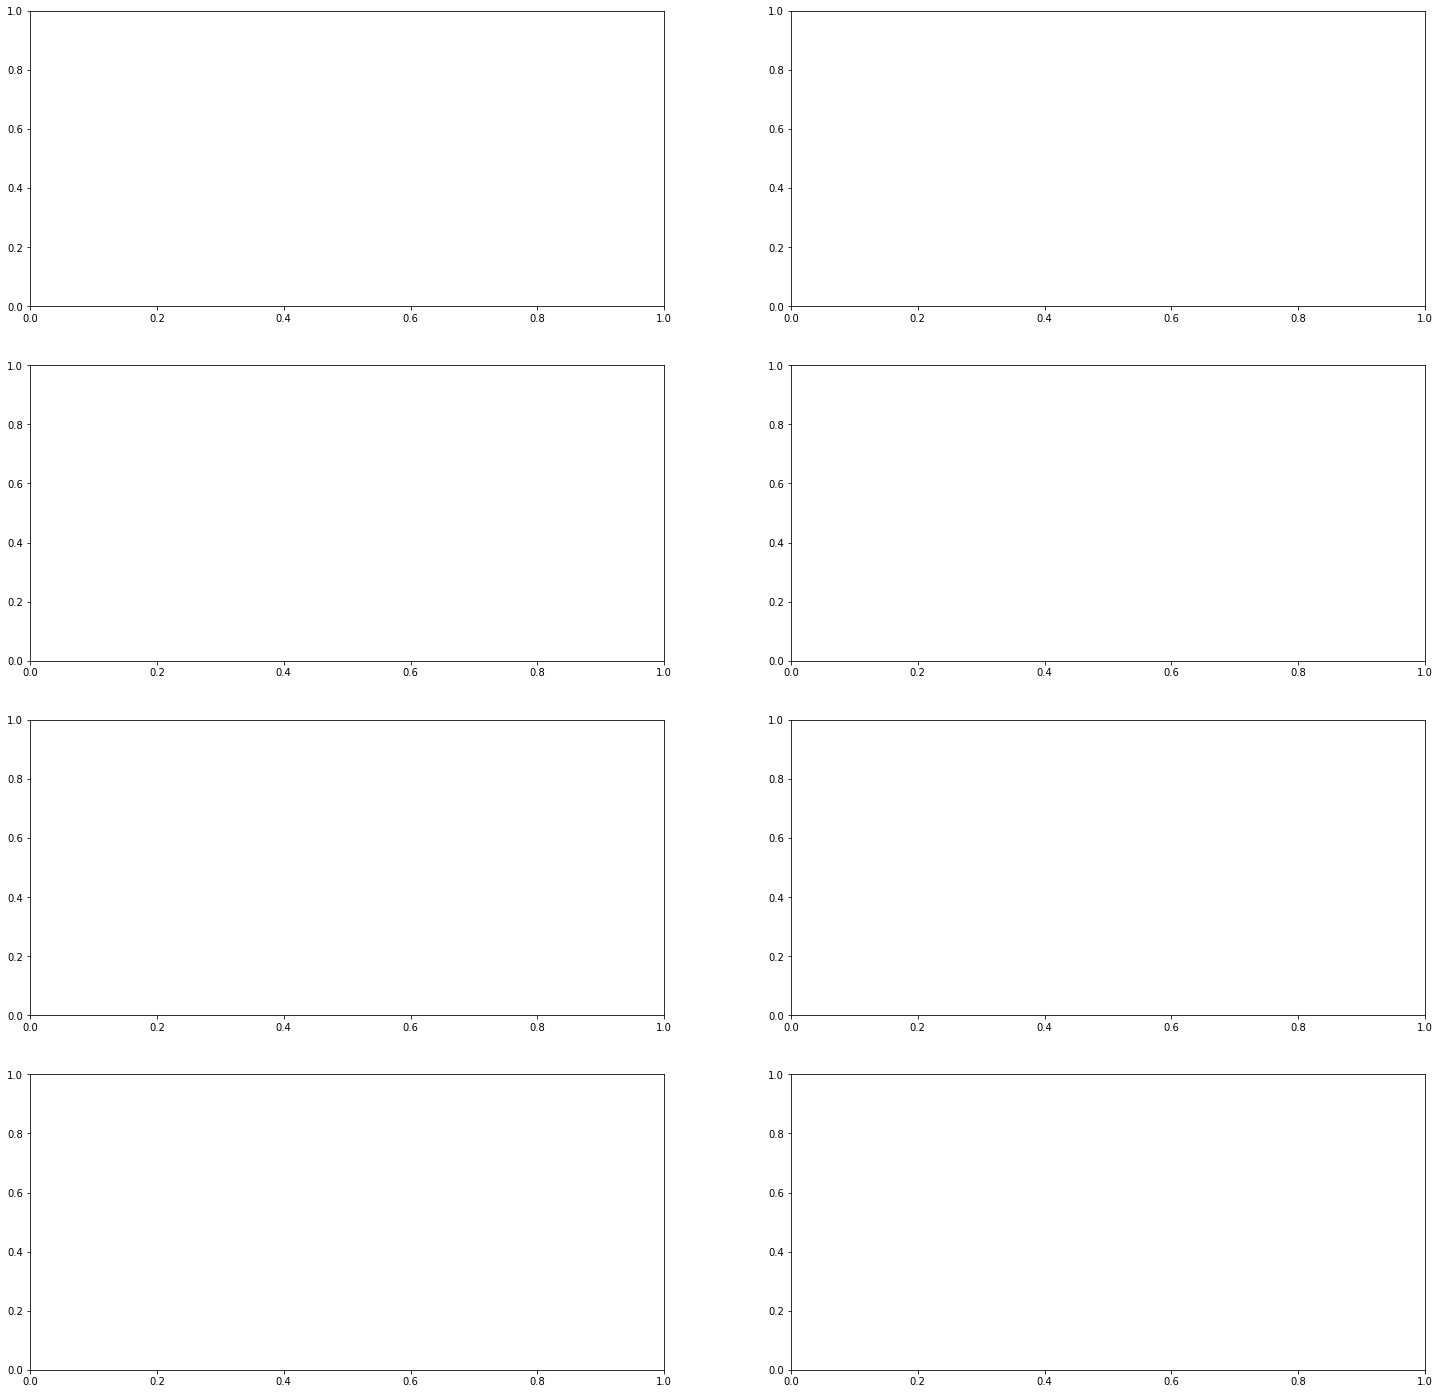

In [22]:
fig = plt.figure(figsize=(25, 25))
axs = [fig.add_subplot(4,2, i+1) for i in range(8)]

for i, column in enumerate(data.columns[:-1]):
    sns.distplot(data[data.Outcome==1][column], ax=axs[i], color='darkorange', label='Yes')
    sns.distplot(data[data.Outcome==0][column], ax=axs[i], color='darkgreen', label='No')
    axs[i].set_title('Distribution for {}'.format(column),fontweight='bold', fontsize=20)
    axs[i].legend(fontsize=20)
plt.show()

ax = sns.distplot(df['Outcome'], color='darkorange')
ax.set_title('Distribution for {}'.format('Outcome'),fontweight='bold', fontsize=15)
plt.show()